In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Diamond Price prediction\diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Preprocessing

### Data Cleaning 

In [5]:
#The first column is of no particular use so we are going to remove it.
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Min value of x,y,z are zero which indicated these are faulty values in data. So we are dropping those faulty data points.

In [7]:
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)

In [8]:
df.shape

(53920, 10)

### Checking if there outliers using Boxplot

In [9]:
cont_features=[feature for feature in df.columns if ((df[feature].dtypes!='O') & (feature not in ['price']))]
cont_features

['carat', 'depth', 'table', 'x', 'y', 'z']

carat


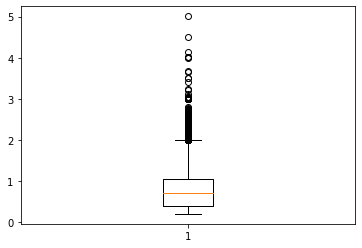

depth


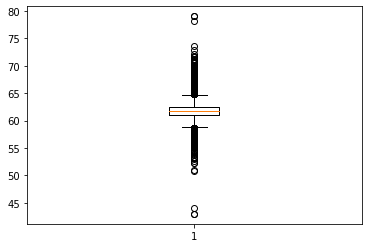

table


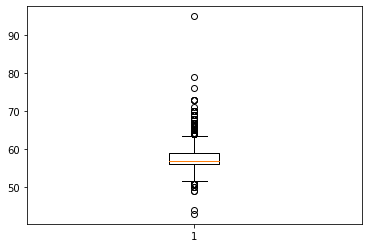

x


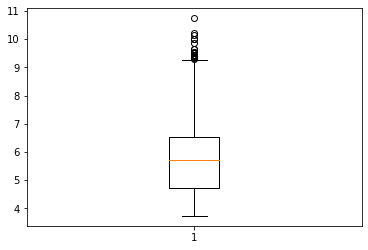

y


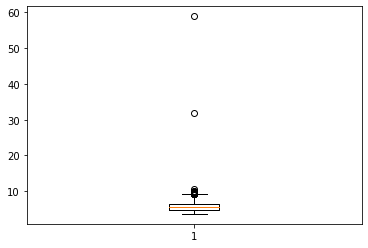

z


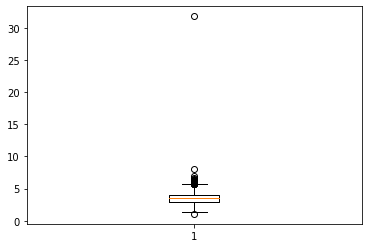

In [10]:
for i in cont_features:
    plt.boxplot(df[i])
    print(i)
    plt.show()

* Since we will be bulding a Decision Tree & they are not sensitive to noisy data or outliers since, extreme values or outliers, never cause much reduction in Residual Sum of Squares(RSS), because they are never involved in the split. So we ignore the treatment of outliers. 

## Exploratory Data Analysis 

### cut vs price 

In [11]:
df.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

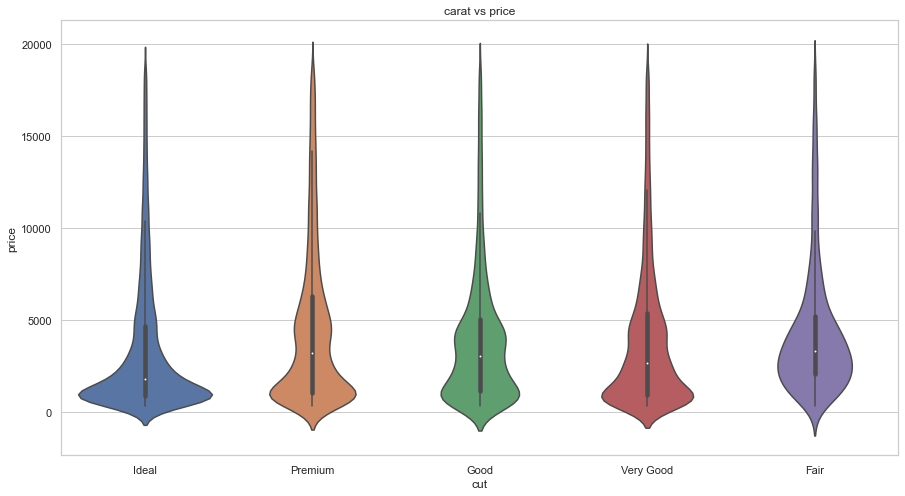

In [12]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.violinplot(x='cut',y='price',data=df)
plt.title('carat vs price')
plt.show()

### color vs price 

In [13]:
df.color.value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

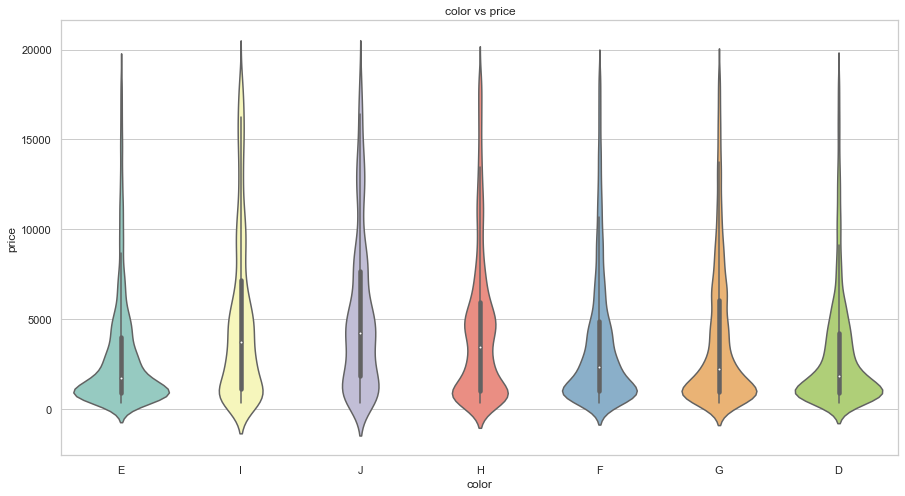

In [14]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.violinplot(x='color',y='price',palette="Set3",data=df)
plt.title('color vs price')
plt.show()

### clarity vs price 

In [15]:
df.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

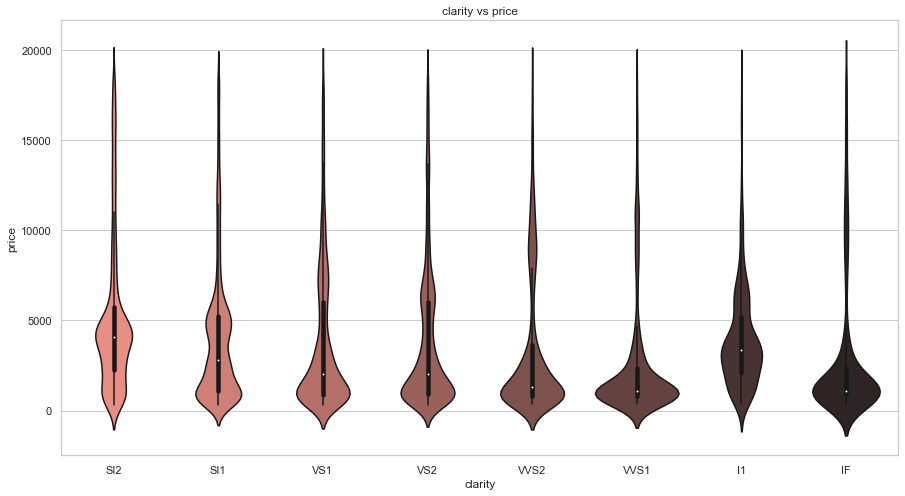

In [16]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.violinplot(x='clarity',y='price',palette='dark:salmon_r',data=df)
plt.title('clarity vs price')
plt.show()

### carat vs price

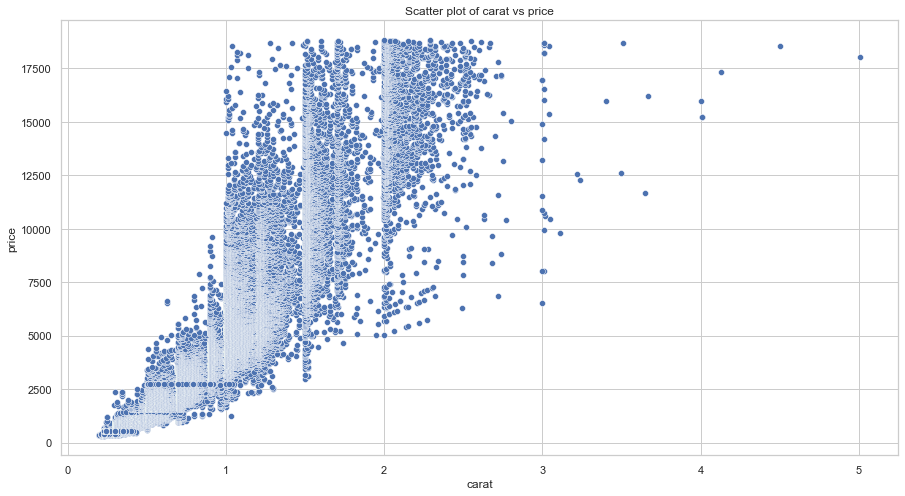

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='carat',y='price',data=df)
plt.title('Scatter plot of carat vs price')
plt.show()

###  depth vs price

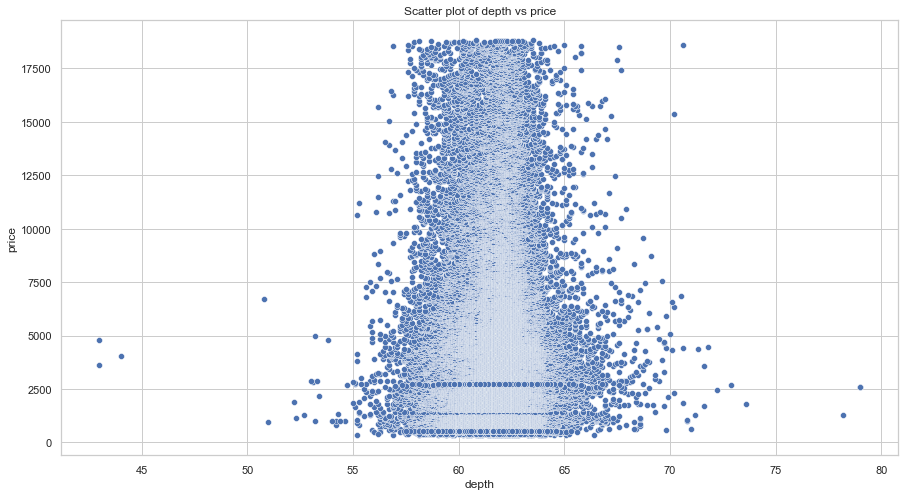

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='depth',y='price',data=df,palette=['green','orange'])
plt.title('Scatter plot of depth vs price')
plt.show()

### table vs price 

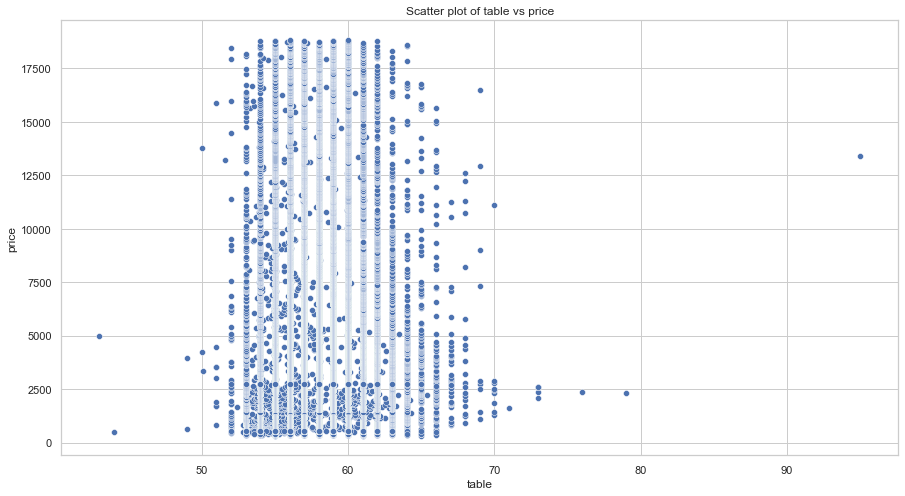

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='table',y='price',data=df)
plt.title('Scatter plot of table vs price')
plt.show()

### x vs price

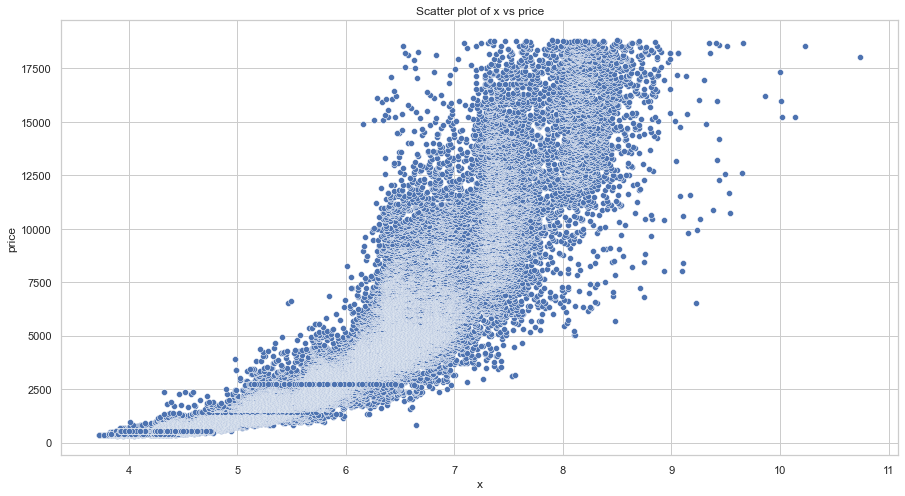

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='x',y='price',data=df)
plt.title('Scatter plot of x vs price')
plt.show()

### y vs price 

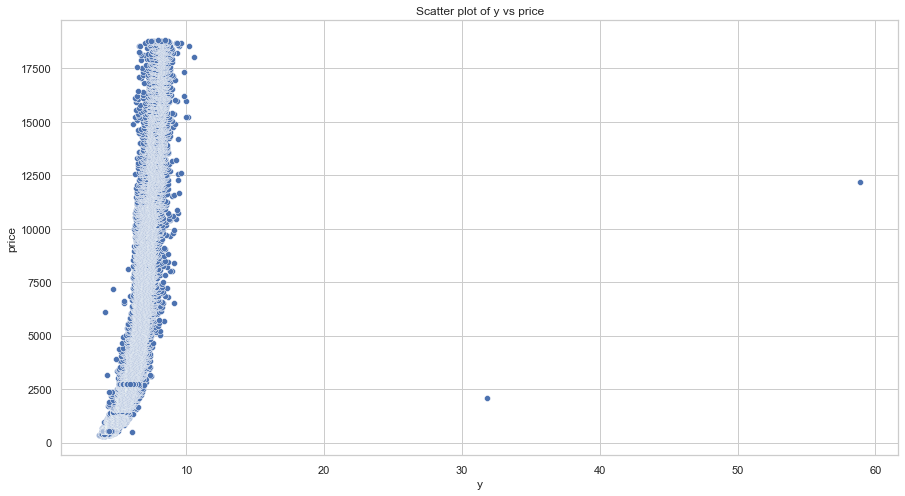

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='y',y='price',data=df,palette=['green','orange'])
plt.title('Scatter plot of y vs price')
plt.show()

### z vs price 

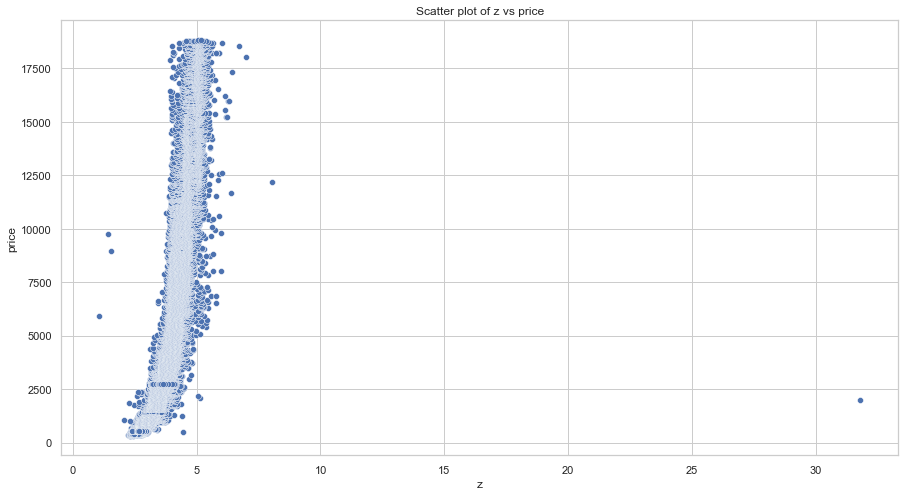

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='z',y='price',data=df,palette=['green','orange'])
plt.title('Scatter plot of z vs price')
plt.show()

## Model Building 

### Decision Tree 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.5+ MB


#### LABEL ENCODING 

In [24]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

In [25]:
column_label = df.select_dtypes(include='object').columns
for col in column_label:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


#### PREDICTORS 

In [26]:
X=df.loc[:,df.columns!='price']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 5.5 MB


In [28]:
X.shape

(53920, 9)

#### TARGET VARIABLE

In [29]:
y = df.iloc[:,9]

In [30]:
y.shape

(53920,)

In [31]:
y

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53935    3.50
53936    3.61
53937    3.56
53938    3.74
53939    3.64
Name: z, Length: 53920, dtype: float64

#### TRAIN & TEST DATA 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [33]:
len(X_train)

37744

In [34]:
len(y_train)

37744

In [35]:
len(X_test)

16176

In [36]:
len(y_test)

16176

In [37]:
y_test.shape

(16176,)

#### FINDING OPTIMUM NUMBER OF DEPTH 

In [38]:
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]

In [39]:
mse_train,mse_test = [],[]

In [40]:
for i in depth:
    prdctr = DecisionTreeRegressor(max_depth=i)
    prdctr.fit(X_train,y_train)
    y_train_pred = prdctr.predict(X_train)
    y_test_pred = prdctr.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))

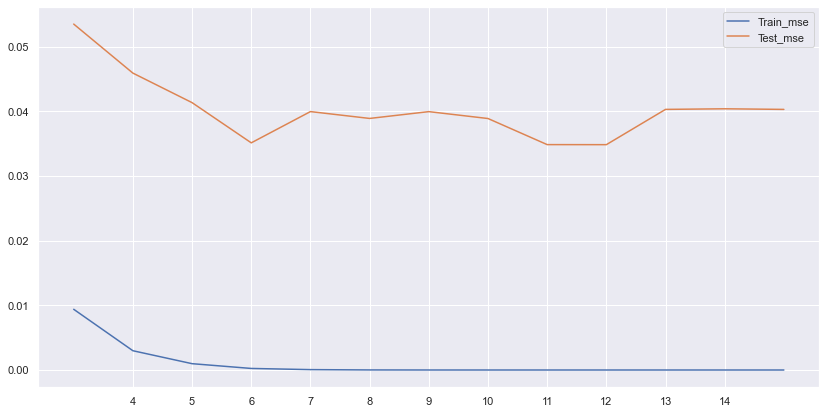

In [41]:
#Lets plot!
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=depth,label='Train_mse')
sns.lineplot(y=mse_test,x=depth,label='Test_mse')
plt.xticks(ticks=np.arange(4,15,1))
plt.show()

* Difference between train_mse and test_mse is minimum seen in depth 12.

#### BUILDING A MODEL 

In [86]:
regr = DecisionTreeRegressor(max_depth=6)

In [87]:
treeregr = regr.fit(X_train,y_train)

In [88]:
treeregr

DecisionTreeRegressor(max_depth=6)

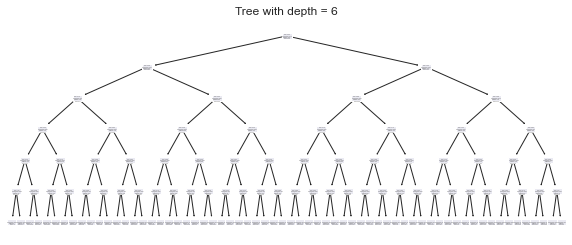

In [89]:
#Plotting tree
plt.figure(figsize=(10,4))
tree.plot_tree(treeregr)
plt.title('Tree with depth = 6')
plt.show()

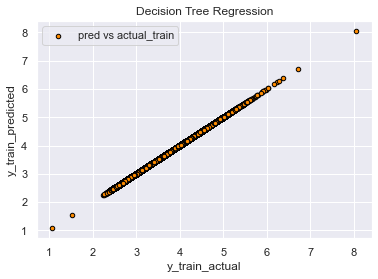

In [90]:
#Plot the results
plt.figure()
plt.scatter(y_train,y_train_pred,s=20,edgecolor='black',c='darkorange',label='pred vs actual_train')
plt.xlabel('y_train_actual')
plt.ylabel('y_train_predicted')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

#### FINDING RMSE 

In [91]:
c

1.0571141460751503e-14


In [92]:
#MSE OF TEST
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

0.2007584838624011


### Random Forest Regression - ensembling technique

In [93]:
regressor = RandomForestRegressor(n_estimators = 100,max_depth=6,random_state=0)

In [94]:
#Fitting the regressor with X and y train data
mod = regressor.fit(X_train,y_train)

In [95]:
#Prediction
y_pred = mod.predict(X_test)

In [108]:
#RMSE
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.1978091639686155


In [97]:
obsno = np.arange(16176)
resid = y_test - y_pred

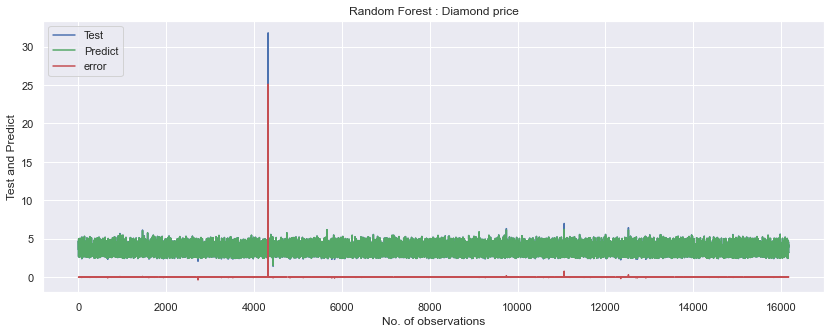

In [98]:
#PLOT
plt.figure(figsize=(14,5))
plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_pred,'g')
plt.plot(obsno,resid,'r')
plt.xlabel('No. of observations')
plt.ylabel('Test and Predict')
plt.title('Random Forest : Diamond price')
plt.legend(labels=('Test','Predict','error'),loc='upper left')
plt.show()

### Random Forest Regression - Grid Search 

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {'bootstrap': [True],'max_depth':[4,5,6,7,8,9,10,11,12,13,14],'max_features':['auto','log2'],'n_estimators':[25,50,100,150,200,250,300,350,400,450]}

In [101]:
rfr = RandomForestRegressor(random_state=1)

In [102]:
g_search = GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)

In [109]:
gmod = g_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [60]:
#BEST PARAMETERS
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 25}


In [61]:
gprd = gmod.predict(X_test)

In [62]:
#RMSE
mse_g = mean_squared_error(y_test,gprd)
mse_g
RMSE_g = np.sqrt(mse_g)
print(RMSE_g)

0.19644775337815815


### Random Forest Regression - Random Search 

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rfr_random = RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)

In [65]:
rmod = rfr_random.fit(X_train,y_train)

In [66]:
#BEST PARAMETER,HYPTER TUNING 
print(rmod.best_params_)
rprd = rmod.predict(X_test)

{'n_estimators': 25, 'max_features': 'auto', 'max_depth': 11, 'bootstrap': True}


In [67]:
#RMSE
mse_r = mean_squared_error(y_test,rprd)
mse_r
RMSE_r = np.sqrt(mse_r)
print(RMSE_r)

0.19644775337815815


### Bagging (or  Bootstrap Aggregating)
The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result.

In [68]:
from sklearn.ensemble import BaggingRegressor

#### BAGGING 300 TREES 

In [70]:
#base estimator is treeregr (decision tree regressor built before)
bc = BaggingRegressor(base_estimator=treeregr,n_estimators=300,oob_score=True,n_jobs=-1)

In [71]:
#Fitting 'bc' to the training set
bc.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                 n_estimators=300, n_jobs=-1, oob_score=True)

In [72]:
y_predB = bc.predict(X_test)

In [80]:
y_predB.shape

(16176,)

In [77]:
#RMSE
mse_b = mean_squared_error(y_test,y_predB)
rmse_b = np.sqrt(mse)
print(rmse_b)

0.1967727149667938


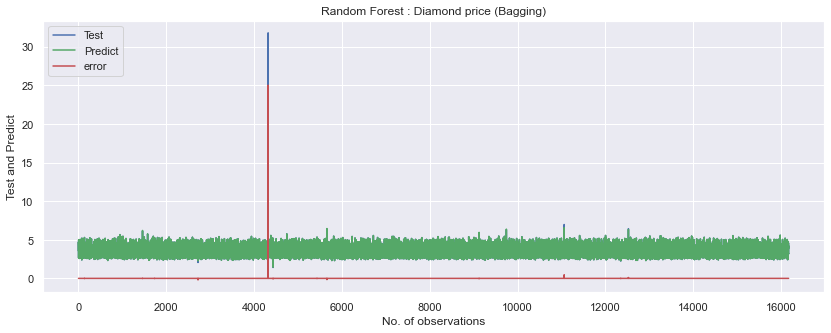

In [85]:
#PLOT
plt.figure(figsize=(14,5))
plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_predB,'g')
plt.plot(obsno,resid,'r')
plt.xlabel('No. of observations')
plt.ylabel('Test and Predict')
plt.title('Random Forest : Diamond price (Bagging)')
plt.legend(labels=('Test','Predict','error'),loc='upper left')
plt.show()